In [4]:
import numpy as np
import matplotlib.pylab as plt

In [9]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

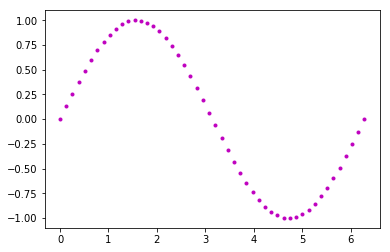

In [10]:
plt.plot(x, y, 'm.')